In [26]:
import mysql.connector #importing the library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [27]:

#connect to the database
mydb=mysql.connector.connect(
   host='localhost',
   user='user',
   password='password'
)

print(mydb.is_connected())

True


In [28]:
cur=mydb.cursor()

In [29]:
#selecting the db where my dataset is stored
cur.execute("Show databases")
for db in cur:
    print(db)

('information_schema',)
('mysql',)
('performance_schema',)
('sys',)
('system_db',)
('test',)


In [30]:
#using db system_db as the data is stored in that db in Mysql
cur.execute("use system_db")

In [31]:
cur.execute("show tables")
for tables in cur:
    print(tables)

('employee',)
('employees',)


In [33]:
cur.execute("select * from employee")
records = cur.fetchall()


In [35]:
employees = pd.DataFrame(records, columns=['Education', 'Joining year','City','payment tier','Age','gender','everbenced','experience','leaveornot' ])


In [36]:
employees.head()

,Education,Joining year,City,payment tier,Age,gender,everbenced,experience,leaveornot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1


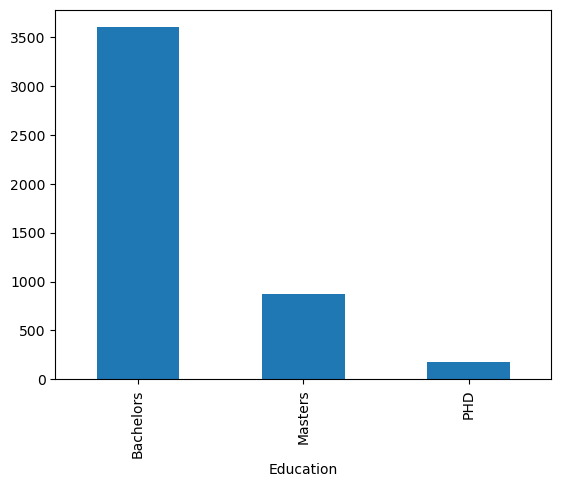

In [47]:
employees.groupby('Education').count()['Joining year'].plot(kind='bar')
plt.show()

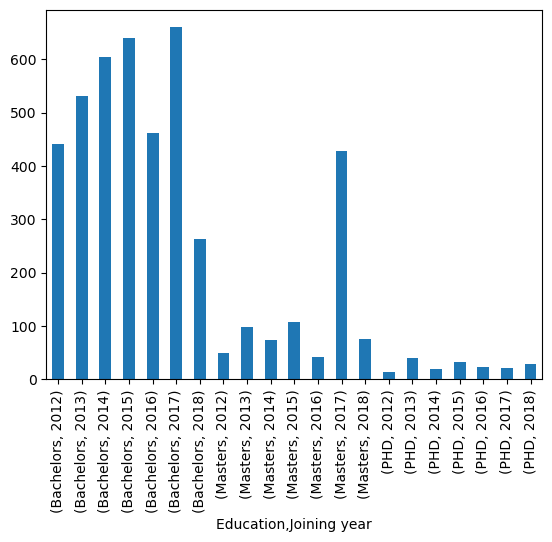

In [48]:
employees.groupby(['Education','Joining year']).count()['Age'].plot(kind='bar')
plt.show()

<Axes: xlabel='City,Education,gender'>

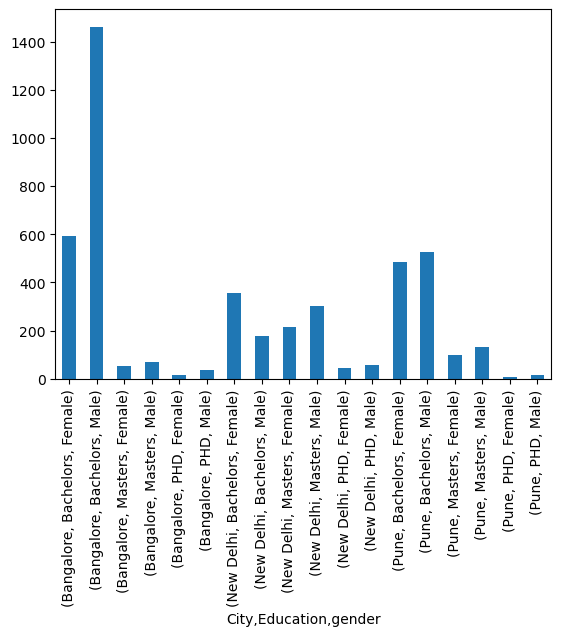

In [50]:
#city wise education and gender count
employees.groupby(['City','Education','gender']).count()['Age'].plot(kind='bar')


<Axes: xlabel='City'>

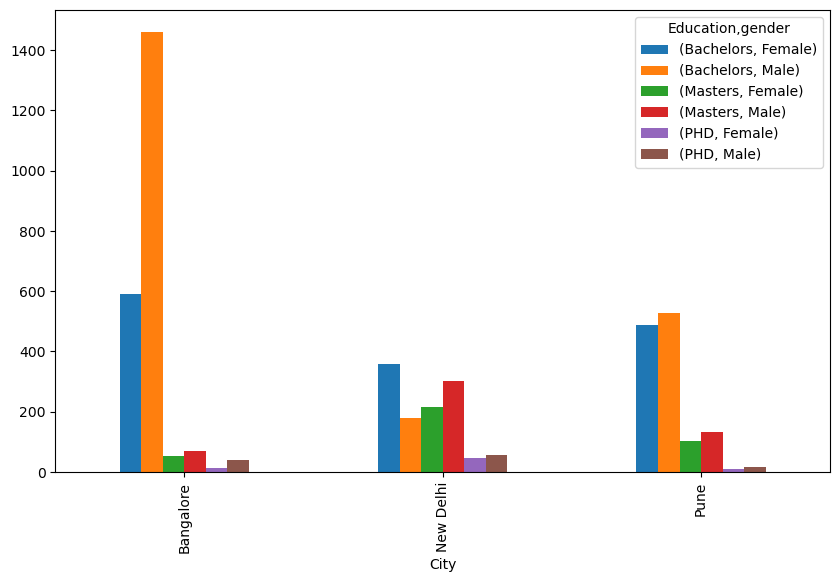

In [52]:
# Assuming 'employees' is your DataFrame
# First group by 'City', 'Education', 'Gender' and count 'Age'
grouped_data = employees.groupby(['City', 'Education', 'gender']).count()['Age']
# Then unstack 'Education' and 'Gender' to create a multi-level index for columns
pivot_data = grouped_data.unstack(level=['Education', 'gender'])

# Plot the bar chart using the pivot data
pivot_data.plot(kind='bar', figsize=(10, 6))

# Further customization of the plot, like labels and title, can be added here


<Axes: >

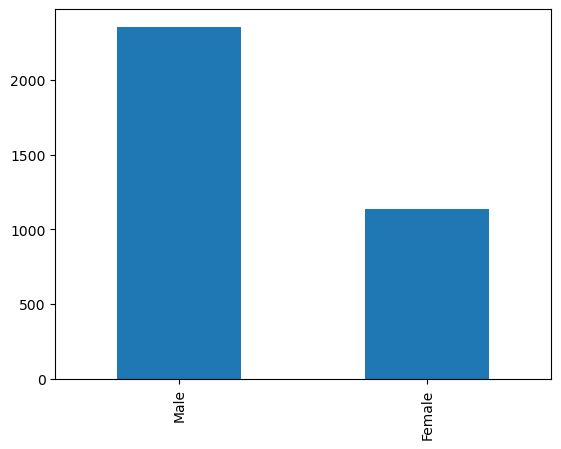

In [59]:
employees[employees['payment tier']==3]['gender'].value_counts().plot(kind='bar')